In [1]:
#!pip install prophet

In [2]:
import pandas as pd
import numpy as nd
import seaborn as sns 
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
#importinng dataset
avocado_df = pd.read_csv('avocado.csv')

In [4]:
avocado_df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avocado_df = avocado_df.sort_values("Date")

In [7]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


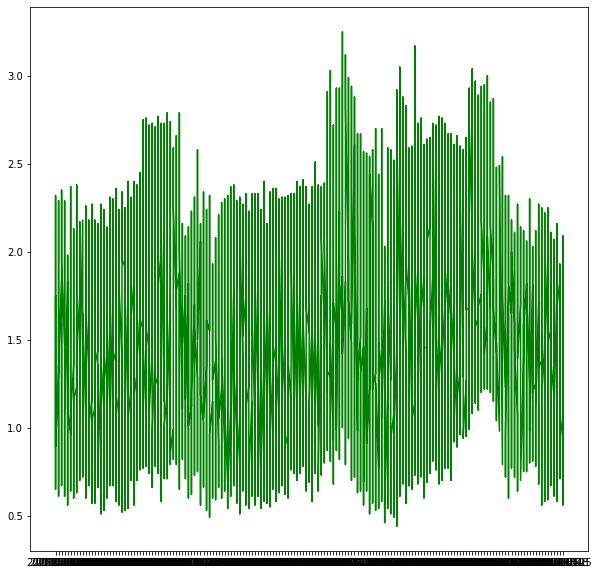

In [8]:
plt.figure(figsize=(10 ,10)) 
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'], color='g')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

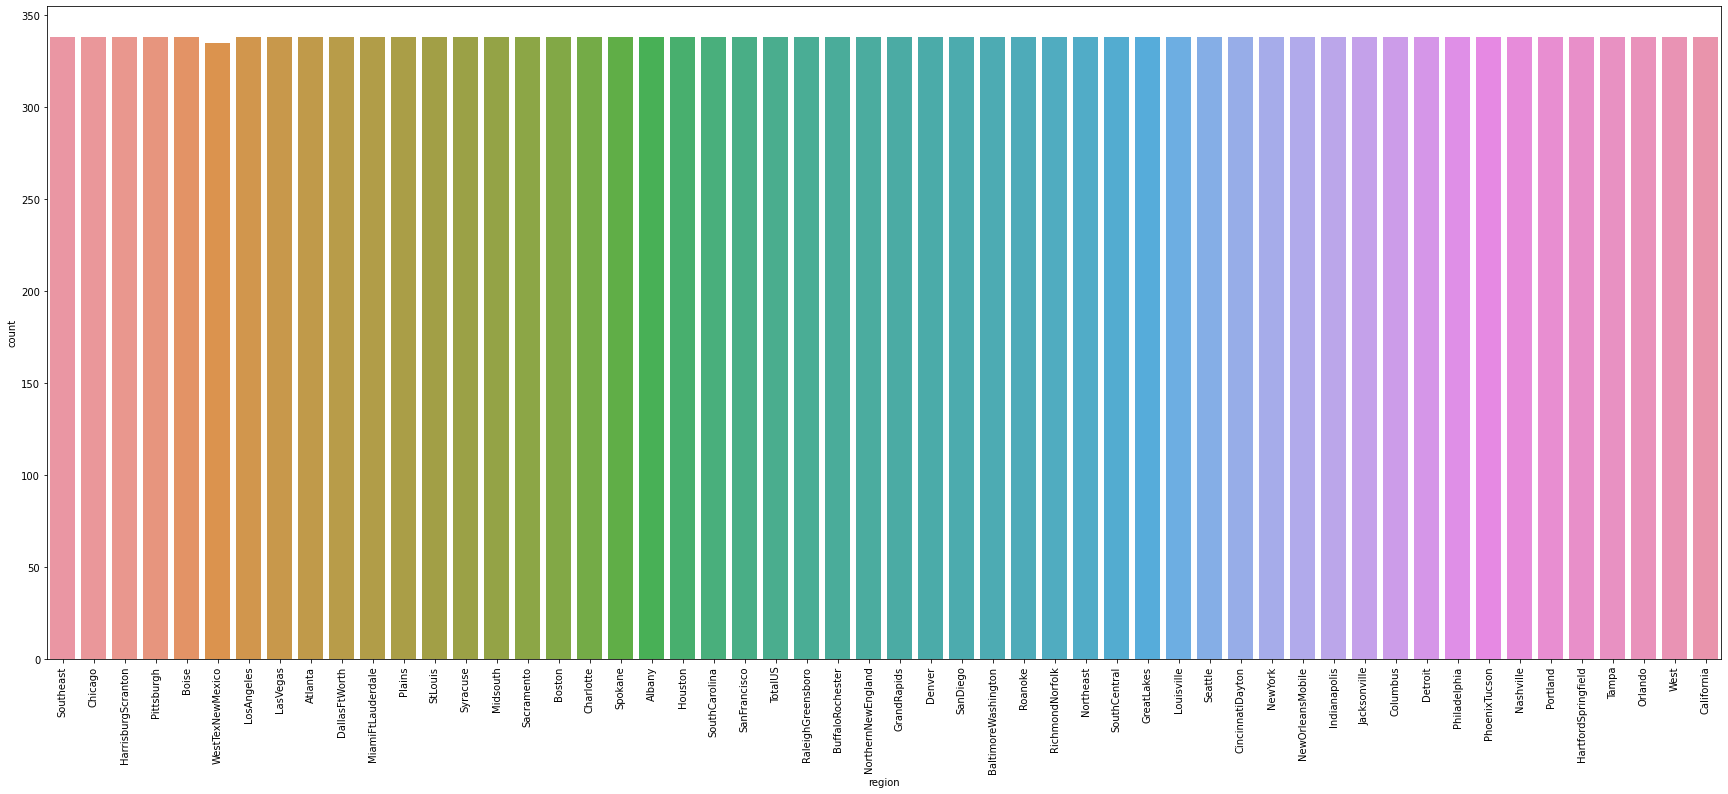

In [9]:
plt.figure(figsize=(30, 12))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 90)

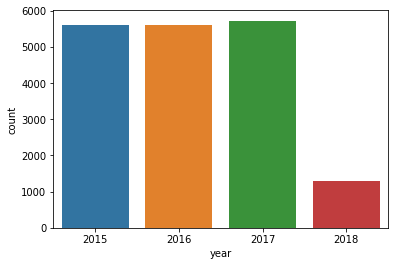

In [10]:
sns.countplot(x = 'year', data=avocado_df)

In [11]:
avocado_proph_df = avocado_df[['Date', 'AveragePrice']]

In [12]:
avocado_proph_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


### Preparing data

In [13]:
avocado_proph_df = avocado_proph_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [14]:
avocado_proph_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


### Trainig the data

In [15]:
## Loading 'Prophet'
m = Prophet()

In [16]:
m.fit(avocado_proph_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/v6ukezhf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/mjr5sue8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34516', 'data', 'file=/tmp/tmpzna7_te7/v6ukezhf.json', 'init=/tmp/tmpzna7_te7/mjr5sue8.json', 'output', 'file=/tmp/tmpzna7_te7/prophet_modelo5yqv56e/prophet_model-20230109112729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
##forcast the feature
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)

In [18]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498608,0.892363,1.849931,1.498608,1.498608,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,0.0,0.0,0.0,1.385337
1,2015-01-11,1.493471,0.873768,1.837128,1.493471,1.493471,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,0.0,0.0,0.0,1.388621
2,2015-01-18,1.488334,0.907600,1.875969,1.488334,1.488334,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,0.0,0.0,0.0,1.383810
3,2015-01-25,1.483198,0.868859,1.849098,1.483198,1.483198,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,0.0,0.0,0.0,1.359729
4,2015-02-01,1.478061,0.814845,1.808306,1.478061,1.478061,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,0.0,0.0,0.0,1.326232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161728,0.573832,1.615879,0.969577,1.343840,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,0.0,0.0,0.0,1.075508
530,2019-03-22,1.160997,0.519331,1.621660,0.967119,1.344153,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,0.0,0.0,0.0,1.076448
531,2019-03-23,1.160266,0.558960,1.594419,0.964660,1.344466,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,0.0,0.0,0.0,1.077662
532,2019-03-24,1.159535,0.524596,1.627879,0.962656,1.344743,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,0.0,0.0,0.0,1.079129


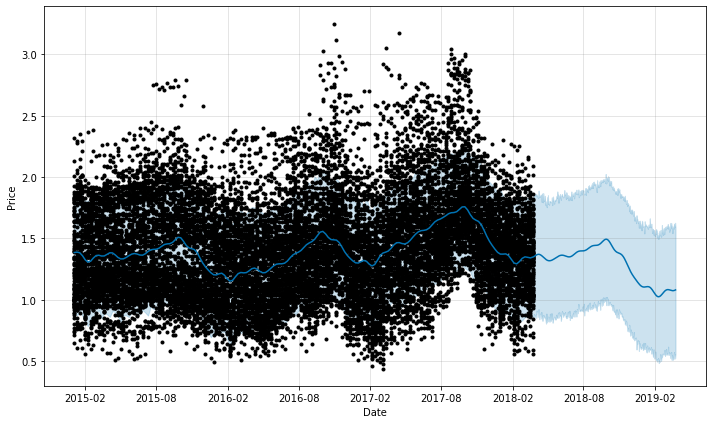

In [19]:
figure = m.plot(forcast, xlabel = 'Date', ylabel = 'Price')

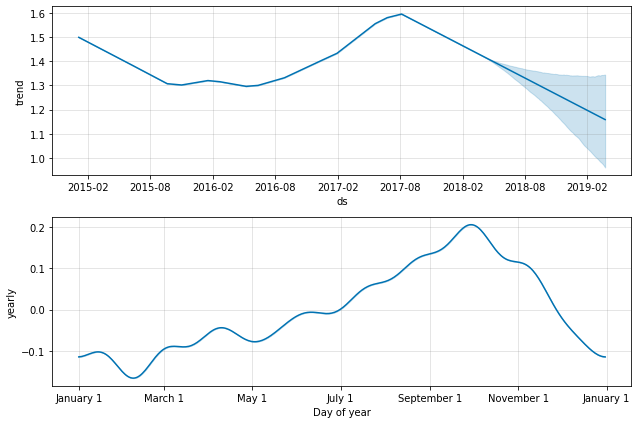

In [20]:
figure = m.plot_components(forcast)

### Data prediction for a specific region

In [21]:
avocado_df_region_west = avocado_df[avocado_df['region'] == 'West']

In [22]:
avocado_df_region_west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [23]:
avocado_df_region_west  = avocado_df_region_west.sort_values('Date')

In [24]:
avocado_df_region_west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


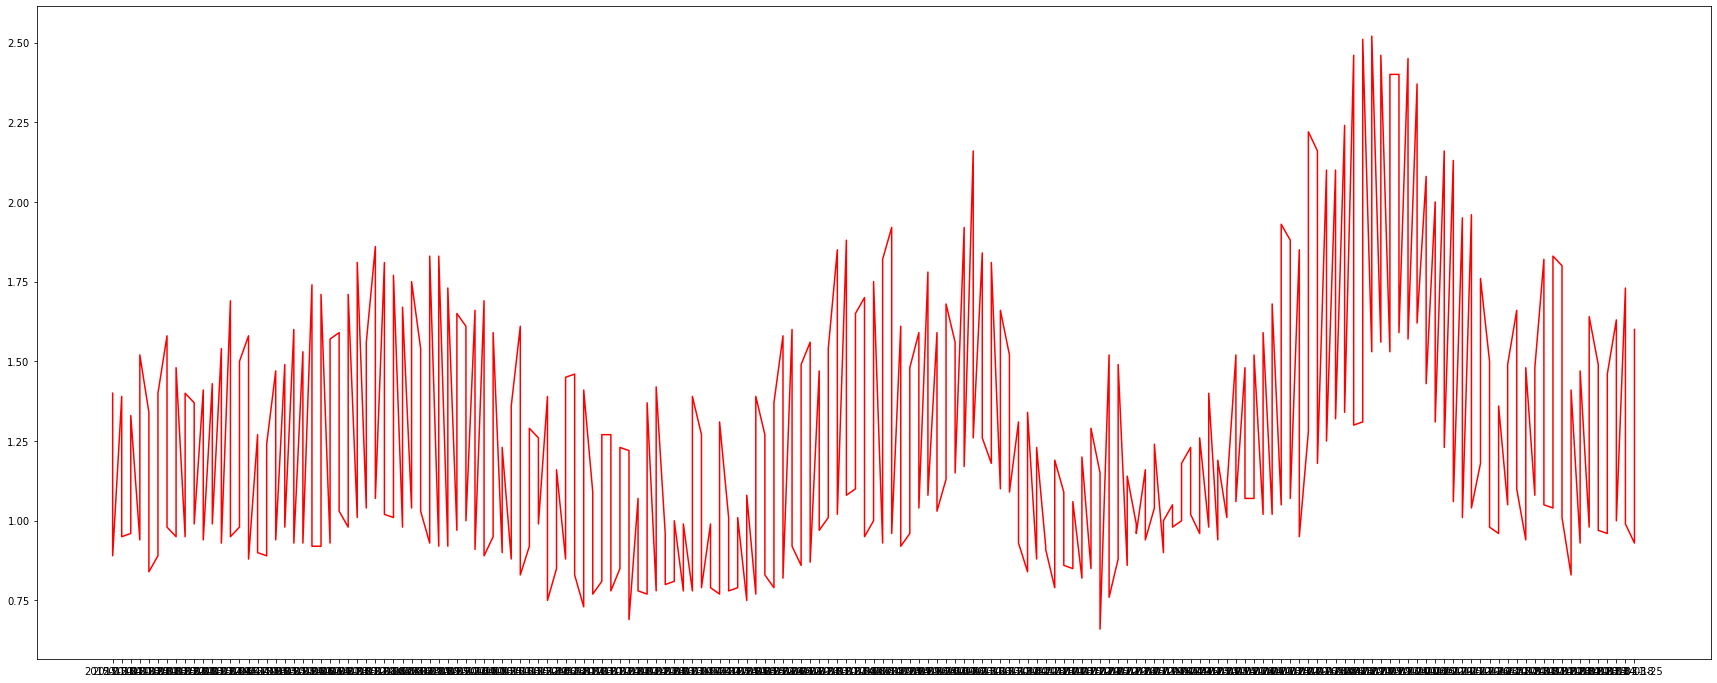

In [25]:
plt.figure(figsize=(30, 12)) 
plt.plot(avocado_df_region_west['Date'], avocado_df_region_west['AveragePrice'], color='r')


In [26]:
avocado_proph_df_region_west = avocado_df_region_west.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [27]:
avocado_region_west = Prophet()
avocado_region_west.fit(avocado_proph_df_region_west)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/fcvg6ysv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/_zubv0if.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7774', 'data', 'file=/tmp/tmpzna7_te7/fcvg6ysv.json', 'init=/tmp/tmpzna7_te7/_zubv0if.json', 'output', 'file=/tmp/tmpzna7_te7/prophet_model68rg9iyq/prophet_model-20230109112746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
##forcast the feature for WEST resgion
future_avo_region_west = avocado_region_west.make_future_dataframe(periods=365)
forcast_avo_region_west = avocado_region_west.predict(future_avo_region_west)

In [29]:
forcast_avo_region_west

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287002,0.654262,1.513067,1.287002,1.287002,-0.188980,-0.188980,-0.188980,-0.188980,-0.188980,-0.188980,0.0,0.0,0.0,1.098022
1,2015-01-11,1.284754,0.663439,1.568337,1.284754,1.284754,-0.173447,-0.173447,-0.173447,-0.173447,-0.173447,-0.173447,0.0,0.0,0.0,1.111308
2,2015-01-18,1.282507,0.672244,1.545854,1.282507,1.282507,-0.164990,-0.164990,-0.164990,-0.164990,-0.164990,-0.164990,0.0,0.0,0.0,1.117517
3,2015-01-25,1.280259,0.693073,1.555056,1.280259,1.280259,-0.176268,-0.176268,-0.176268,-0.176268,-0.176268,-0.176268,0.0,0.0,0.0,1.103992
4,2015-02-01,1.278012,0.655411,1.507705,1.278012,1.278012,-0.197314,-0.197314,-0.197314,-0.197314,-0.197314,-0.197314,0.0,0.0,0.0,1.080698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.726800,1.116184,1.924670,1.693208,1.761318,-0.209024,-0.209024,-0.209024,-0.209024,-0.209024,-0.209024,0.0,0.0,0.0,1.517777
530,2019-03-22,1.727361,1.116927,1.967441,1.693614,1.762029,-0.203959,-0.203959,-0.203959,-0.203959,-0.203959,-0.203959,0.0,0.0,0.0,1.523403
531,2019-03-23,1.727922,1.087571,1.957514,1.694019,1.762699,-0.198319,-0.198319,-0.198319,-0.198319,-0.198319,-0.198319,0.0,0.0,0.0,1.529603
532,2019-03-24,1.728483,1.137942,1.947549,1.694425,1.763344,-0.192208,-0.192208,-0.192208,-0.192208,-0.192208,-0.192208,0.0,0.0,0.0,1.536275


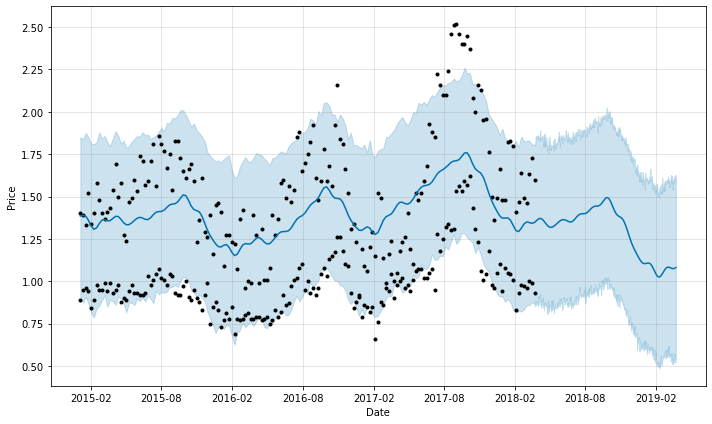

In [30]:
figure_avo_region_west = avocado_region_west.plot(forcast, xlabel = 'Date', ylabel = 'Price')

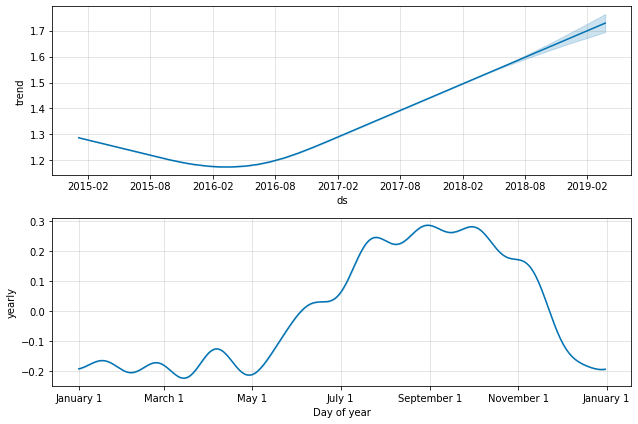

In [31]:
figure_avo = avocado_region_west.plot_components(forcast_avo_region_west)

In [32]:
### Data prediction for SouthCentral
avocado_df_region_SouthCentral = avocado_df[avocado_df['region']=='SouthCentral']

In [33]:
avocado_df_region_SouthCentral

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2391,51,2015-01-04,0.77,5144267.01,2745009.10,1755142.21,73432.89,570682.81,442217.85,128451.37,13.59,conventional,2015,SouthCentral
11517,51,2015-01-04,1.35,53494.91,24139.72,8586.46,0.00,20768.73,20622.28,146.45,0.00,organic,2015,SouthCentral
2390,50,2015-01-11,0.80,5409726.02,2973367.52,1717171.24,88373.78,630813.48,533599.20,97164.07,50.21,conventional,2015,SouthCentral
11516,50,2015-01-11,1.39,53328.53,27767.97,8596.61,0.00,16963.95,16873.34,90.61,0.00,organic,2015,SouthCentral
11515,49,2015-01-18,1.27,65242.77,32913.28,6344.03,0.00,25985.46,25780.00,205.46,0.00,organic,2015,SouthCentral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,2,2018-03-11,0.89,6621293.03,3309218.10,926223.64,28752.60,2357098.69,1820819.54,472662.31,63616.84,conventional,2018,SouthCentral
18142,1,2018-03-18,1.28,154056.32,27820.20,6264.66,0.00,119971.46,101198.09,18773.37,0.00,organic,2018,SouthCentral
9019,1,2018-03-18,0.86,6579144.13,3289390.32,1115203.69,28384.40,2146165.72,1625982.91,455350.18,64832.63,conventional,2018,SouthCentral
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral


In [34]:
avocado_df_region_SouthCentral = avocado_df_region_SouthCentral.sort_values('Date')

In [35]:
avocado_df_region_SouthCentral

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2391,51,2015-01-04,0.77,5144267.01,2745009.10,1755142.21,73432.89,570682.81,442217.85,128451.37,13.59,conventional,2015,SouthCentral
11517,51,2015-01-04,1.35,53494.91,24139.72,8586.46,0.00,20768.73,20622.28,146.45,0.00,organic,2015,SouthCentral
2390,50,2015-01-11,0.80,5409726.02,2973367.52,1717171.24,88373.78,630813.48,533599.20,97164.07,50.21,conventional,2015,SouthCentral
11516,50,2015-01-11,1.39,53328.53,27767.97,8596.61,0.00,16963.95,16873.34,90.61,0.00,organic,2015,SouthCentral
11515,49,2015-01-18,1.27,65242.77,32913.28,6344.03,0.00,25985.46,25780.00,205.46,0.00,organic,2015,SouthCentral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,2,2018-03-11,0.89,6621293.03,3309218.10,926223.64,28752.60,2357098.69,1820819.54,472662.31,63616.84,conventional,2018,SouthCentral
18142,1,2018-03-18,1.28,154056.32,27820.20,6264.66,0.00,119971.46,101198.09,18773.37,0.00,organic,2018,SouthCentral
9019,1,2018-03-18,0.86,6579144.13,3289390.32,1115203.69,28384.40,2146165.72,1625982.91,455350.18,64832.63,conventional,2018,SouthCentral
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral


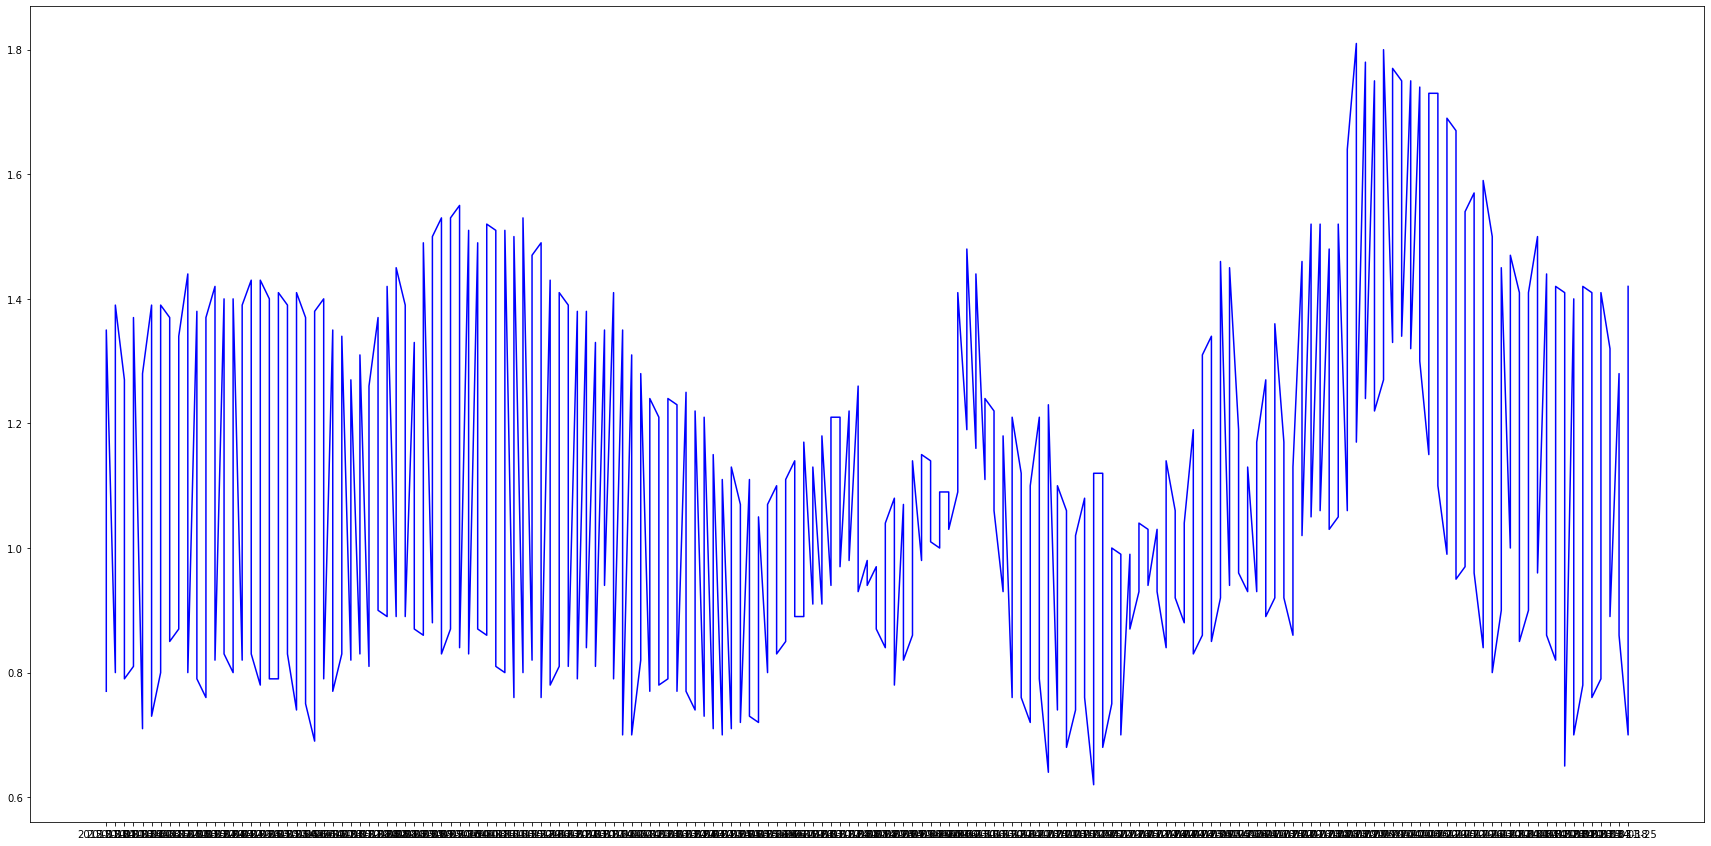

In [36]:
plt.figure(figsize=(30 ,15))
plt.plot(avocado_df_region_SouthCentral['Date'], avocado_df_region_SouthCentral['AveragePrice'], color='b')

In [37]:
avocado_proph_df_region_SouthCentral = avocado_df_region_SouthCentral.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [38]:
m = Prophet()
m.fit(avocado_proph_df_region_SouthCentral)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/w4n6gwld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzna7_te7/4j_1ynyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71732', 'data', 'file=/tmp/tmpzna7_te7/w4n6gwld.json', 'init=/tmp/tmpzna7_te7/4j_1ynyt.json', 'output', 'file=/tmp/tmpzna7_te7/prophet_modeli0q4t118/prophet_model-20230109112751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
avo_region_SouthCentral = m.make_future_dataframe(periods=365)
forcast_avo_region_SouthCentral = m.predict(avo_region_SouthCentral)

In [40]:
forcast_avo_region_SouthCentral

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.122765,0.740138,1.393169,1.122765,1.122765,-0.052475,-0.052475,-0.052475,-0.052475,-0.052475,-0.052475,0.0,0.0,0.0,1.070289
1,2015-01-11,1.121839,0.740050,1.430596,1.121839,1.121839,-0.054340,-0.054340,-0.054340,-0.054340,-0.054340,-0.054340,0.0,0.0,0.0,1.067499
2,2015-01-18,1.120913,0.743470,1.417907,1.120913,1.120913,-0.059925,-0.059925,-0.059925,-0.059925,-0.059925,-0.059925,0.0,0.0,0.0,1.060988
3,2015-01-25,1.119987,0.720285,1.396815,1.119987,1.119987,-0.076874,-0.076874,-0.076874,-0.076874,-0.076874,-0.076874,0.0,0.0,0.0,1.043113
4,2015-02-01,1.119061,0.674102,1.351550,1.119061,1.119061,-0.101030,-0.101030,-0.101030,-0.101030,-0.101030,-0.101030,0.0,0.0,0.0,1.018032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.372930,0.956193,1.610276,1.352910,1.393167,-0.089837,-0.089837,-0.089837,-0.089837,-0.089837,-0.089837,0.0,0.0,0.0,1.283094
530,2019-03-22,1.373307,0.948033,1.636204,1.353125,1.393589,-0.088322,-0.088322,-0.088322,-0.088322,-0.088322,-0.088322,0.0,0.0,0.0,1.284985
531,2019-03-23,1.373683,0.959240,1.608132,1.353358,1.393988,-0.086635,-0.086635,-0.086635,-0.086635,-0.086635,-0.086635,0.0,0.0,0.0,1.287048
532,2019-03-24,1.374059,0.948538,1.632581,1.353592,1.394419,-0.084811,-0.084811,-0.084811,-0.084811,-0.084811,-0.084811,0.0,0.0,0.0,1.289249


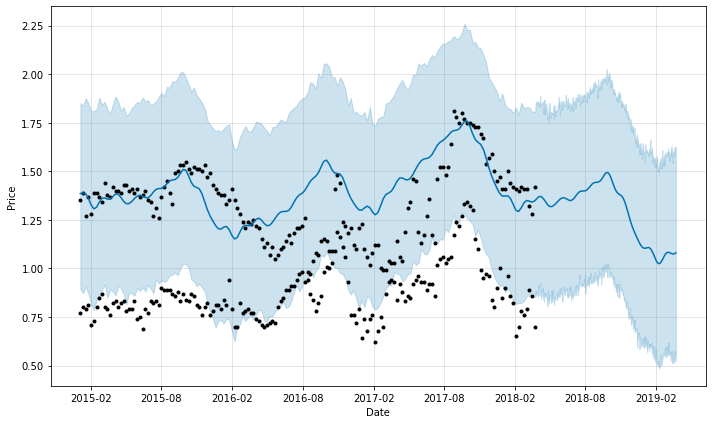

In [41]:
figure_avo_region_SouthCentral = m.plot(forcast, xlabel = 'Date', ylabel = 'Price')

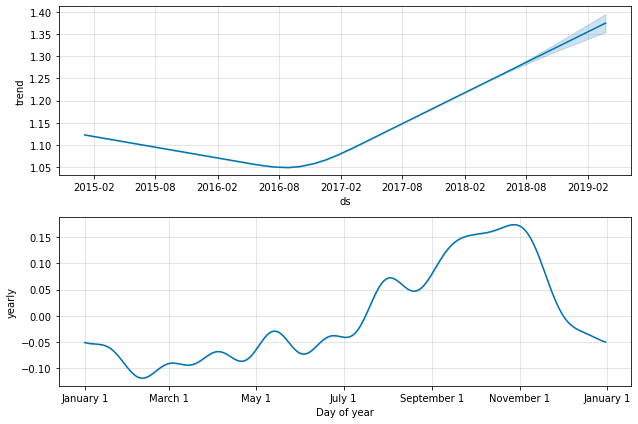

In [42]:
forcast_SF=m.plot_components(forcast_avo_region_SouthCentral)